In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(1234)

# Classification
# $ \\ $
# $ \\ $
# Recall previously: Machine Learning
## A new paradigm for solving problems with computers
### Old way: program computers explicitly
```python
if x[0] > 2.3:
    return x - 1
elif x[1] < -3.4:
    return x + 1.2
else:
    return x
```
# $ \\ $
### New way: show programs example data and let them program themselves
# $ \\ $
# $ \\ $
# $ \\ $
# Hypothesis: ML will be very useful for NLP. 
## Why do we think this way?
# $ \\ $
# $ \\ $
## It's hard to explicitly program all the rules / procedures for natural language problems
 - ## Language is ambiguous
 - ## The input space for language is very large (100k words)



# $ \\ $
# $ \\ $
# Recall the three progressions
 - ## ML Models
 - ## Text representation
 - ## Problems we can solve

# $ \\ $
## We now know
 - ## Some ML 
 - ## Ways to represent text

## So let's solve a problem

# $ \\ $


# $ \\ $
# $ \\ $


# $ \\ $
# $ \\ $
# Procedure for doing ML in practice
![alt text](ml_workflow.jpg "ML Workflow")


# $ \\ $
# $ \\ $
# We will largely use popular packages for ML
## `scikit-learn`
 - ### higher-level
 - ### easier
 - ### less flexible


## `keras` (`tensorflow`)
 - ### lower level
 - ### somewhat harder
 - ### more flexible because we have control over internals



# $ \\ $
# $ \\ $
![alt text](sklearn_keras_workflow.jpg "sklearn vs keras")

# $ \\ $
# $ \\ $
# $ \\ $
# $ \\ $
# What's Missing?
# $ \\ $
# $ \\ $
## What problems will we frame?
## What models will we propose
## How will we find $\theta$ that minimize $J(\theta)$

# $ \\ $
# $ \\ $
# Classification
## Identifying to which of a set of categories (sub-populations) a new observation belongs, on the basis of a training set of data containing observations (or instances) whose category membership is known.
# $ \\ $
# $ \\ $
## In other words: given a known set of categories, identify which category(ies) new observations belong.
# $ \\ $
# $ \\ $
## This is the most basic and most important NLP problem we'll solve!

# $ \\ $
## Recall our model vs instance based ML example

<Figure size 1600x1200 with 0 Axes>

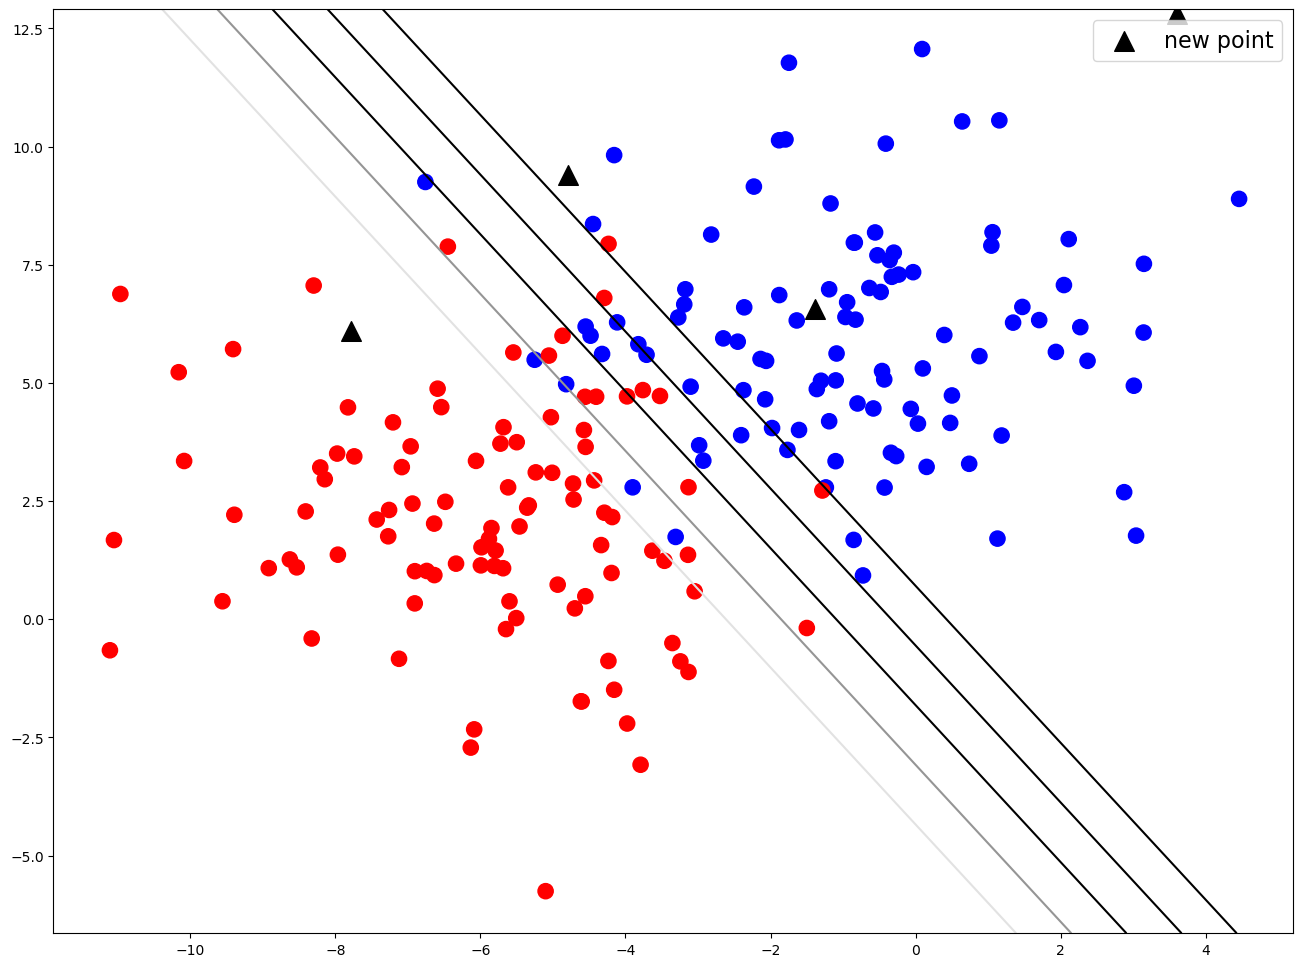

In [9]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from matplotlib.patches import Circle


x, y = make_blobs(n_samples=200, cluster_std=2.3, centers=2, random_state=1234)
colormap = "rb"
colors = [colormap[label] for label in y]

plt.figure(figsize=(16, 12))
f, ax = plt.subplots(figsize=(16, 12))
ax.scatter(x[:, 0], x[:, 1], c=colors, s=120)

lr = LogisticRegression()
lr.fit(x, y)


x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.mgrid[x_min:x_max:0.05, y_min:y_max:0.05]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = lr.predict_proba(grid)[:, 1].reshape(xx.shape)

ax.contour(
    xx, yy, probs, levels=[0.1, 0.25, 0.5, 0.75, 0.9], cmap="Greys", vmin=0, vmax=0.5
)

new_points = grid[np.random.choice(np.arange(grid.shape[0]), 4)]
ax.scatter(
    new_points[:, 0], new_points[:, 1], c="k", marker="^", s=200, label="new point"
)
plt.legend(fontsize=16)

## What are we classifying?
# $ \\ $
# $ \\ $
## Known categories: `red` and `blue`
## Identify whether the new points (black triangles) are `red` or `blue`
# $ \\ $
# $ \\ $
## We can have more than two colors as well!

<Figure size 1600x1200 with 0 Axes>

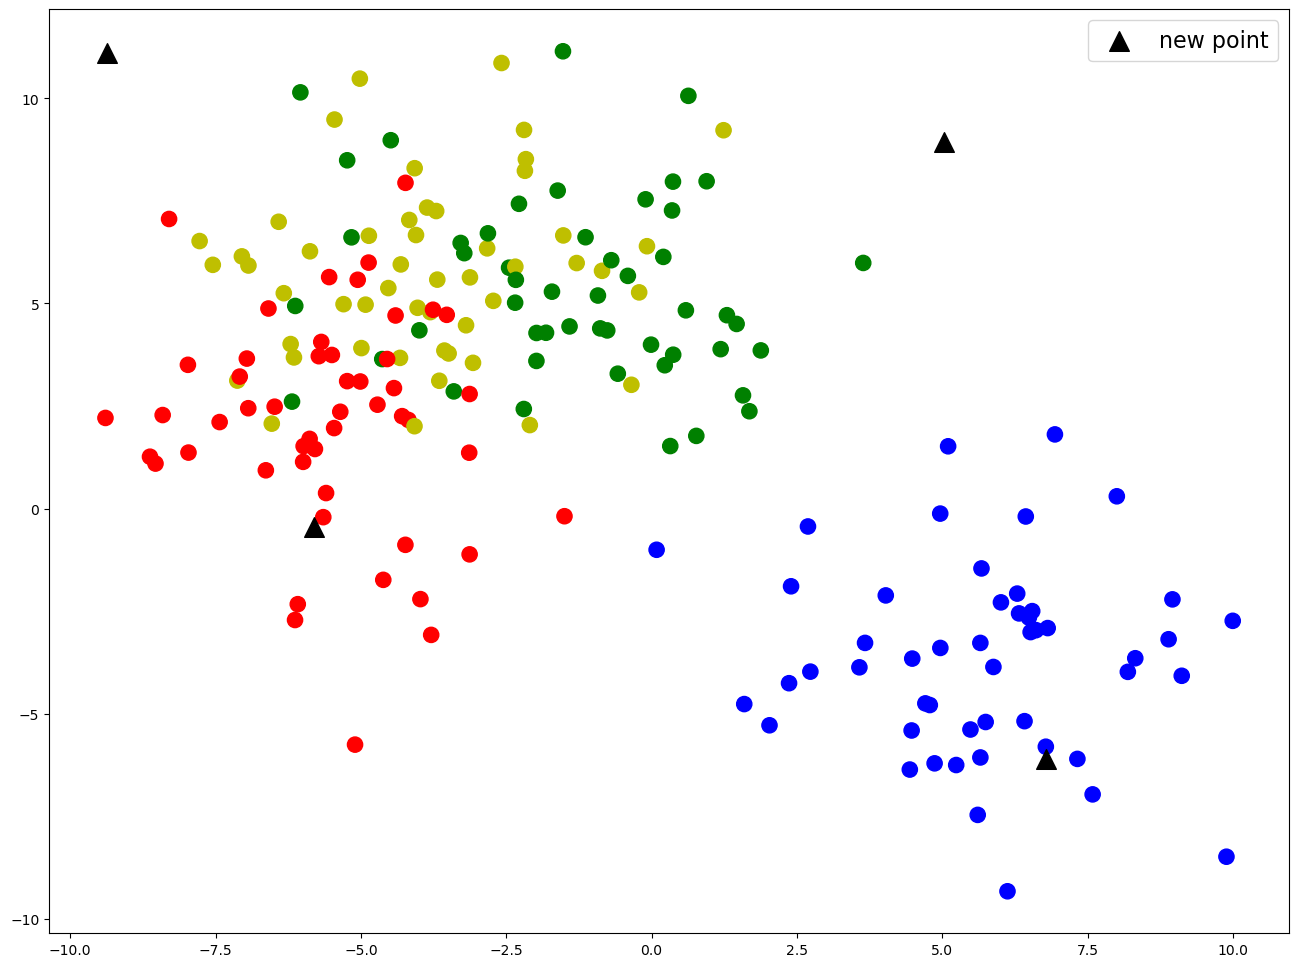

In [11]:
x, y = make_blobs(n_samples=200, cluster_std=2.3, centers=4, random_state=1234)
colormap = "rgby"
colors = [colormap[label] for label in y]

plt.figure(figsize=(16, 12))
f, ax = plt.subplots(figsize=(16, 12))
ax.scatter(x[:, 0], x[:, 1], c=colors, s=120)


x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.mgrid[x_min:x_max:0.05, y_min:y_max:0.05]
grid = np.c_[xx.ravel(), yy.ravel()]


new_points = grid[np.random.choice(np.arange(grid.shape[0]), 4)]
ax.scatter(
    new_points[:, 0], new_points[:, 1], c="k", marker="^", s=200, label="new point"
)
plt.legend(fontsize=16)

## What are the known categories here?
# $ \\ $
# $ \\ $
 - ## red
 - ## blue
 - ## green
 - ## yellow

# $ \\ $
# $ \\ $
# Classification problems in NLP
# $ \\ $
# $ \\ $
 - ## Given a document predict the author
 - ## Given a document predict whether or not it is about sports
 - ## Given a 10-k filing predict what company issued it
 - ## Given a document, identify it as positive or negative sentiment. 

# $ \\ $
# $ \\ $
# Teaser for more complex classification problems:
 - ## Given a sentence identify which words refer to companies
   - ### Target sales for `Enron` `Inc.` dropped sharply due competition from `Exxon Mobil`
 - ## Given a document and question about the document, identify which words answer the question
   - ### Doc: George Washington was born on February 22, 1732, at Popes Creek in the state of Virginia
   - ### Question: where was Washington born
   - ### Answer: George Washington was born on February 22, 1732, at `Popes Creek in the state of Virginia`
# $ \\ $

# $ \\ $
# Types of classification problems:
 - ## Binary: (only two choices)
   - ### Example: is the text positive or negative sentiment
 - ## Multi-class (more than two choices)
   - ### Example: is the text positive, neutral, or negative sentiment
 - ## Multi-label: examples can have more than one category
   - ### Example: label the text as relevant to `international trade` and `natural disasters`
   - ### Here a piece of text can be about BOTH!
# $ \\ $
# $ \\ $

# $ \\ $
# $ \\ $
# What is _NOT_ a classification problem?
# $ \\ $
# $ \\ $
## Regression: predicting contiuous values
 - ## Example: predict stock returns based on an earnings press release
 - ## Example: predict a house's price based on square footage and zip code
 
# $ \\ $

## Clustering:
 - ## Determine how many different categories exist in a data set
 - ## Break a dataset into 8 partitions without any examples

# $ \\ $
# $ \\ $

Text(0.5, 1.0, 'How many different categories exist in the data')

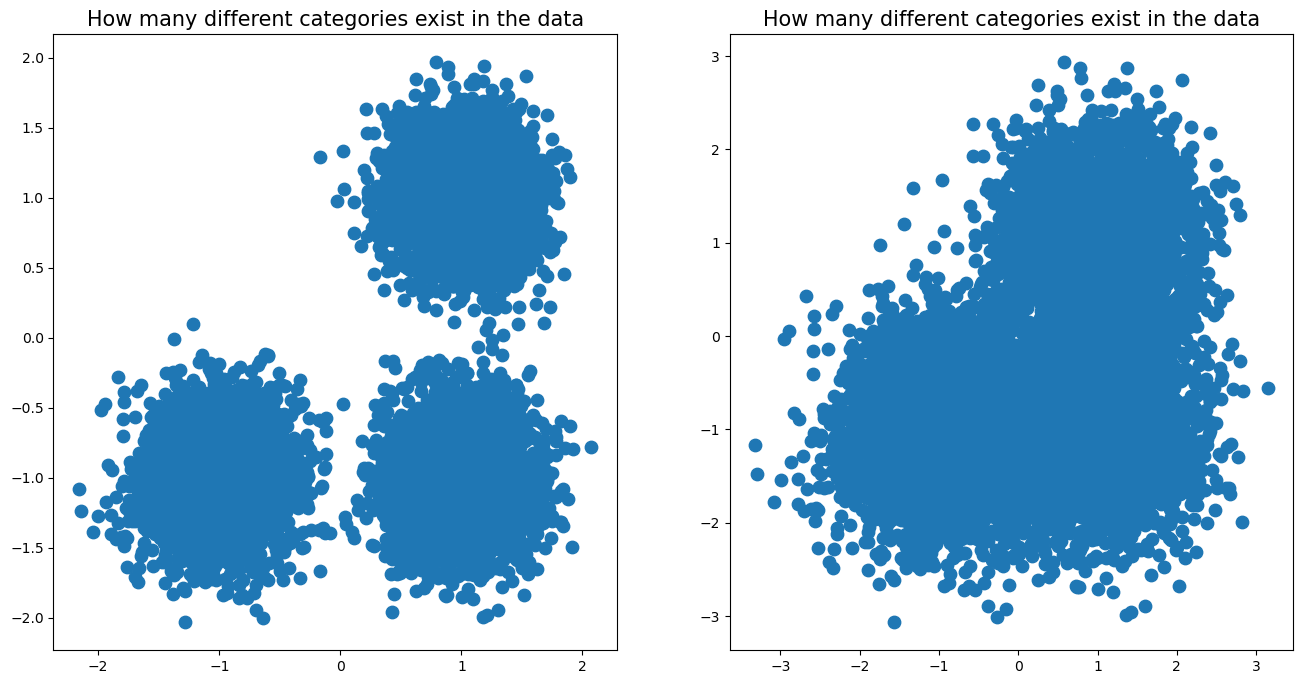

In [16]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

f, ax = plt.subplots(figsize=(16, 8), nrows=1, ncols=2)
plt.title("How many different categories exist in the data")

centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = make_blobs(n_samples=10000, centers=centers, cluster_std=0.3, random_state=1234)
ax[0].scatter(X[:, 0], X[:, 1], s=80)
ax[0].set_title("How many different categories exist in the data", fontsize=15)

X2, _ = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6, random_state=1234)
ax[1].scatter(X2[:, 0], X2[:, 1], s=80)

ax[1].set_title("How many different categories exist in the data", fontsize=15)

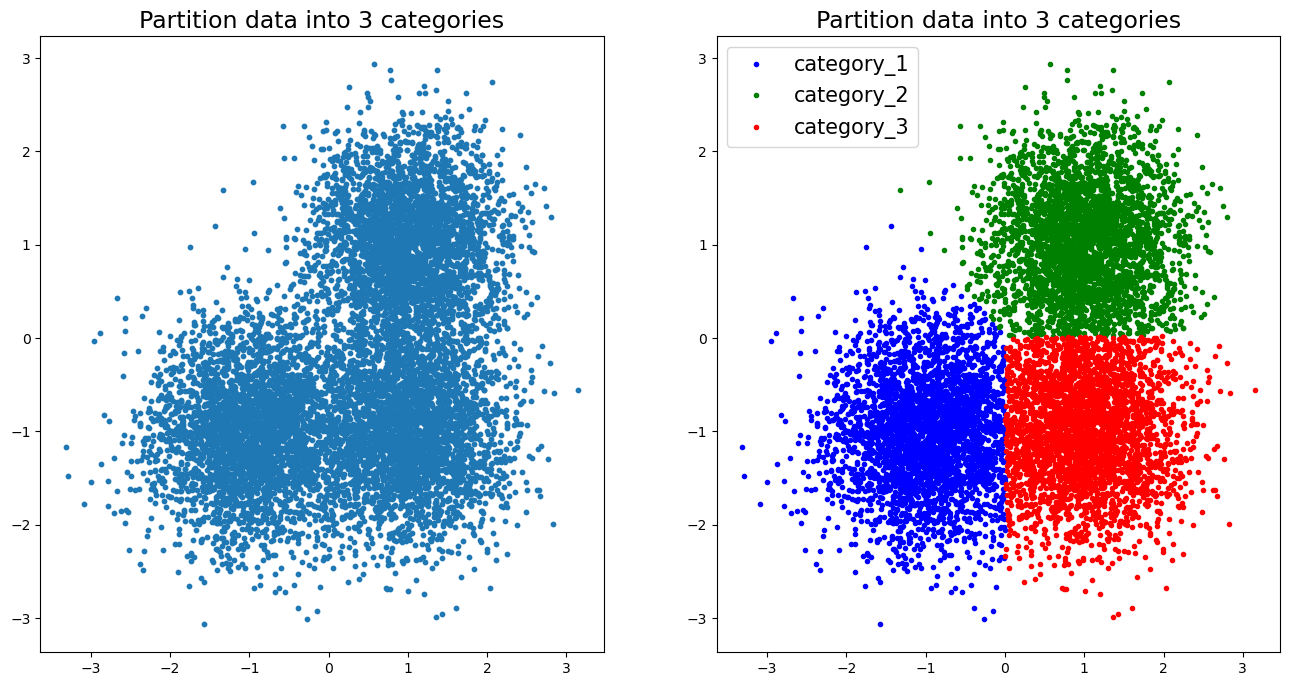

In [17]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from itertools import cycle

centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6, random_state=1234)

km = KMeans(n_clusters=len(centers))
km.fit(X)
labels = km.labels_
cluster_centers = km.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)


f, ax = plt.subplots(figsize=(16, 8), nrows=1, ncols=2)
ax[0].scatter(X[:, 0], X[:, 1], s=10)
ax[0].set_title("Partition data into %d categories" % n_clusters_, fontsize=17)

colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    ax[1].plot(
        X[my_members, 0], X[my_members, 1], col + ".", label="category_{}".format(k + 1)
    )
plt.title("Partition data into %d categories" % n_clusters_, fontsize=17)
plt.legend(fontsize=15)
plt.show()

# The Simplest NLP Classification Problem
 - ## Input: text
 - ## Output: boolean (yes or no)

# $ \\ $
# To explore this it helps to have a problem in mind
# $ \\ $
# $ \\ $
# $ \\ $
# Stanford IMDB dataset
### http://ai.stanford.edu/~amaas/data/sentiment/
# $ \\ $
### This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well. Raw text and already processed bag of words formats are provided. See the README file contained in the release for more details
# $ \\ $
# $ \\ $
## Stats:
 - 50k movie reviews of popular movies
 - each one is labeled as `positive` or `negative`

# A Negative Review:
### As a history nut who is particularly interested in this particular historical event, I was very disappointed with the movie. Granted, the costumes and staging was quite authentic, but the Hollywood portrayal of this "British Little Big Horn" was truly boring.<br /><br />The amount of film footage dedicated to marching or parading troops has to have been unprecedented in film history. Eveytime I heard triumphant background music begin, I knew I had to prepare myself for another laborious scene of meaningless filler. Obviously, the producers had invested heavily into "staging" and were determined to get their money's worth.<br /><br />Despite the outstanding cast, their dialogue was, again, boring and their characters were never developed. Whenever Peter O'toole or Burt Lancaster finished a scene, I would cringe with disappointment. Their given lines were so weak and meaningless that I could hardly believe these were the same two great actors who portrayed Lawrence of Arabia and the Bird Man of Alcatraz respectively.<br /><br />There are worse epics, but this one is not much better

$ \\ $
$ \\ $
$ \\ $
# A Positive Review:
### An American in Paris is a wonderful musical about an American painter living in Paris for inspiration. He meets a rich woman who admires his paintings on the street and she believes she can get his work to be even more popular to the public, e.g. in a museum. Golden Globe nominated Gene Kelly as the artist Jerry Mulligan is just perfect at both singing and especially dancing. He also meets the main girl Lise Bouvier (Leslie Caron) who is engaged to his best friend. He can't help his feelings for this girl, even after he finds out who she is engaged to. Filled with nice romance and wonderful song and dance, this is a very good musical film. It may drag slightly with his dancing dream sequence, i.e. The American in Paris ballet, but there is a good happy ending. It won the Oscars for Best Art Direction-Set Decoration, Best Cinematography, Best Costume Design, Best Music, Scoring of a Musical Picture, Best Writing, Story and Screenplay and Best Picture, and it was nominated for Best Director for Vincente Minnelli and Best Film Editing, it was nominated the BAFTA for Best Film from any Source, and it won the Golden Globe for Best Motion Picture - Musical/Comedy, and it was nominated for Best Director for Vincente Millenni (Liza's father). Gene Kelly was number 66 on The 100 Movie Stars, and he was number 15 on 100 Years, 100 Stars - Men, "I Got Rhythm" was number 32 on 100 Years, 100 Songs, the film was number 9 on 100 Years of Musicals, it was number 39 on 100 Years, 100 Passions, it was number 68 on 100 Years, 100 Movies, and it was number 58 on The 100 Greatest Musicals. Very good!

# Why is it so hard? 

# A Negative Review:
### As a history nut who is particularly interested in this particular historical event, I was very disappointed with the movie. Granted, the costumes and staging was quite authentic, but the Hollywood portrayal of this "British Little Big Horn" was truly boring.<br /><br />The amount of film footage dedicated to marching or parading troops has to have been unprecedented in film history. Eveytime I heard triumphant background music begin, I knew I had to prepare myself for another laborious scene of meaningless filler. Obviously, the producers had invested heavily into "staging" and were determined to get their money's worth.<br /><br />Despite `**the outstanding cast**`, their dialogue was, again, boring and their characters were never developed. Whenever Peter O'toole or Burt Lancaster finished a scene, I would cringe with disappointment. Their given lines were so weak and meaningless that I could hardly believe these were the same `**two great actors**` who portrayed Lawrence of Arabia and the Bird Man of Alcatraz respectively.<br /><br />There are worse epics, but this one is not much better

$ \\ $
$ \\ $
$ \\ $
# A Positive Review:
### An American in Paris is a wonderful musical about an American painter living in Paris for inspiration. He meets a rich woman who admires his paintings on the street and she believes she can get his work to be even more popular to the public, e.g. in a museum. Golden Globe nominated Gene Kelly as the artist Jerry Mulligan is just perfect at both singing and especially dancing. He also meets the main girl Lise Bouvier (Leslie Caron) who is engaged to his best friend. He can't help his feelings for this girl, even after he finds out who she is engaged to. Filled with nice romance and wonderful song and dance, this is a very good musical film. `**It may drag**` slightly with his dancing dream sequence, i.e. The American in Paris ballet, but there is a good happy ending. It won the Oscar for Best Art Direction-Set Decoration, Best Cinematography, Best Costume Design, Best Music, Scoring of a Musical Picture, Best Writing, Story and Screenplay and Best Picture, and it was nominated for Best Director for Vincente Minnelli and Best Film Editing, it was nominated the BAFTA for Best Film from any Source, and it won the Golden Globe for Best Motion Picture - Musical/Comedy, and it was nominated for Best Director for Vincente Millenni (Liza's father). Gene Kelly was number 66 on The 100 Movie Stars, and he was number 15 on 100 Years, 100 Stars - Men, "I Got Rhythm" was number 32 on 100 Years, 100 Songs, the film was number 9 on 100 Years of Musicals, it was number 39 on 100 Years, 100 Passions, it was number 68 on 100 Years, 100 Movies, and it was number 58 on The 100 Greatest Musicals. Very good!

# $ \\ $
# $ \\ $


# Why do I care about sentiment analysis? 

## Maybe you do: I want to trade the next xbox release:
 - ### How do I figure out what people on reddit think about the xbox? 

# $ \\ $
# $ \\ $
![](spg-sentiment.png)
# $ \\ $
## Maybe you don't... it is often a proxy for something else that is measurable
 - ### e.g. stock price

In [23]:
import os

directory_path = '../data/aclImdb/train/'
try:
    files = os.listdir(directory_path)
    for file in files:
        print(file)
except FileNotFoundError:
    print(f"The directory {directory_path} does not exist.")

urls_unsup.txt
neg
urls_pos.txt
unsup
urls_neg.txt
pos
unsupBow.feat
labeledBow.feat


In [24]:
with open("../data/aclImdb/train/pos/2002_7.txt") as fi:
    print(fi.read())

To a certain extent, I actually liked this film better than the original VAMPIRES. I found that movie to be quite misogynistic. As a woman and a horror fan, I'm used to the fact that women in peril are a staple of the genre. But they just slap Sheryl Lee around way too much. In this movie, Natasha Wagner is a more fully-realized character, and the main bad guy is a gal! Arly Jover (who played a sidekick vamp in BLADE) is very otherworldly and deadly. Jon Bon Jovi... okay, yeah, no great actor, but he does OK. At least he doesn't start to sing. Catch it on cable if you can. It's on Encore Action this month.


# $ \\ $
# $ \\ $
# $ \\ $
# TODO
## 0. Load the data

## 1. Figure out how to represent our data
  - Recall: we've seen __bag of words__
 
## 2. Propose some naive (stupid) baseline models
  - This is __always__ a good thing to do to make sure we understand the data

## 3. Prose a real model for modeling sentiment
  - We'll also come up with a loss function $J(\theta)$

## 4. Evaluate how well our model does
# $ \\ $
# $ \\ $

# Step 0: Load the data
## Recall: the data are organized
 - ### `train/pos`
 - ### `train/neg`
 - ### `test/pos`
 - ### `test/neg`

In [27]:
import glob
import numpy as np


def load_imdb_data_text(imdb_data_dir, random_seed=1234):
    train_dir = os.path.join(imdb_data_dir, "train")
    test_dir = os.path.join(imdb_data_dir, "test")

    np.random.seed(random_seed)
    texts = []
    targets = []
    for label in ("pos", "neg"):
        data_dir = os.path.join(train_dir, label)
        files = glob.glob(os.path.join(data_dir, "*.txt"))
        for filename in files:
            with open(filename) as fi:
                text = fi.read()
            target = label == "pos"
            texts.append(text)
            targets.append(target)

    train_docs = texts
    y_train = np.array(targets)

    texts = []
    targets = []
    for label in ("pos", "neg"):
        data_dir = os.path.join(test_dir, label)
        files = glob.glob(os.path.join(data_dir, "*.txt"))
        for filename in files:
            with open(filename) as fi:
                text = fi.read()
            target = label == "pos"
            texts.append(text)
            targets.append(target)

    test_docs = texts
    y_test = np.array(targets)

    inds = np.arange(y_train.shape[0])
    np.random.shuffle(inds)

    train_docs = [train_docs[i] for i in inds]
    y_train = y_train[inds]

    return (train_docs, y_train), (test_docs, y_test)

In [28]:
(train_docs, y_train), (test_docs, y_test) = load_imdb_data_text("../data/aclImdb/")
print("found {} train docs and {} test docs".format(len(train_docs), len(test_docs)))

found 25000 train docs and 25000 test docs


In [29]:
train_docs[1]

'"54" is a film based on the infamous "Studio 54" of the 1970s - the hangout for the social elite and party clubbers. In the film, Ryan Phillippe is the main character, based on an actual employee of Studio from 1977 - 1982.<br /><br />The film\'s problem is that it\'s all glitter and style and no substance. It tries to be a really grimy and probing satire like "Boogie Nights" but ultimately comes across as an inferior wannabe. Mike Myers is given the thankless task of playing cocaine-snorting club owner Steve Rubell. It\'s only a slightly comedic role and if this was Myers\' best attempts at sliding into drama like Lemmon and other comedic actors did in their time, it\'s a total failure.<br /><br />"54" could have been insightful and interesting but instead it\'s just another dumb teen flick that isn\'t entertaining or even remotely engaging. View at your own peril.'

# Step 1: Represent the Text
# $ \\ $
# $ \\ $
# How should we represent text?
# $ \\ $
# $ \\ $
# We'll use the bag of words

In [31]:
text = train_docs[123]
print(text)

Give me my money back! Give me my life back! Give me a bit of credit. This movie was vomit worthy. Useless and time consuming. What a waste of energy and totally pointless. Okay I understand the premise and the idea sound but, give us a break! Next time just give me the money and let me spend it. Lost child, mothers remorse, blamed husband! Cliché yes~! Get a life! Sorry but this movie was a total waste of my time, my money and my being. I would rather watch eggs cook! No real explanation to why this happened. Prison? Why? Loss? obvious but Why? Acting deserves a What am I doing here Oscar and the cinematography a Am I just doing this for a Wage? How much did this movie make? Well this silly fool hired a copy. Enough said


## This text is one giant string
## We need to split it into words!
# $ \\ $
# $ \\ $
# $ \\ $

In [33]:
words = text.split()
words[:10]

['Give', 'me', 'my', 'money', 'back!', 'Give', 'me', 'my', 'life', 'back!']

## Recipe:
 - Standardize vocabulary: find all the unique words
 - Turn documents into numbers by counting words
 
## This effectively one-hot-encodes the words
## $D$ documents will become a $D \text{ x } N_{words}$ matrix
### where $N_{words}$ is the number of unique words in the text.


## This is often called a "term-document matrix"

In [35]:
unique_words = list(set(words))
len(unique_words)

92

In [36]:
# Let's turn a single document into a vector
document_vector = np.zeros(len(unique_words), dtype=np.int64)
for word in words:
    index = unique_words.index(word)
    document_vector[index] += 1
pd.Series(document_vector, index=unique_words).sort_values(ascending=False)

a           9
and         6
me          5
this        5
my          5
           ..
totally     1
yes~!       1
copy.       1
hired       1
remorse,    1
Length: 92, dtype: int64

## Pure python implementation

In [38]:
import tqdm
# Count all the unique words in the data (this takes a while)
unique_words = set()
for text in tqdm.tqdm(train_docs):
    words = text.split()
    unique_words = unique_words.union(words)
unique_words = list(set(unique_words))
print(len(unique_words))

100%|████████████████████████████████████| 25000/25000 [01:28<00:00, 283.32it/s]

280617


## How big will our document matrix be?
# $ \\ $
# $ \\ $
# $ \\ $
## $D \text{ x }N_{words} \text{ x }\frac{8Bytes}{int}$
# $ \\ $
# $ \\ $
# $ \\ $

In [40]:
print('{:.2f}MB'.format(len(train_docs) * len(unique_words) * 8 / 1024 / 1024))

53523.45MB


In [41]:
# DO NOT RUN THE CELL BELOW!

```python
# DO NOT RUN
term_doc_matrix = np.zeros((len(train_docs), len(unique_words)))
for document_index, text in enumerate(train_docs):
    words = text.split()
    for word in words:
        word_index = unique_words.index(word)
        term_doc_matrix[document_index, word_index] += 1
```

# $ \\ $
# $ \\ $

# Is this hopeless? 
# How will we ever analyze meaningful amounts of text?
# $ \\ $
# $ \\ $
# $ \\ $
# $ \\ $
# Question: how many of these entries will be non-zero?
 - ## How many unique words, how many words per document?

# $ \\ $
# $ \\ $
# We are saved by two things:
 - ## Efficient implementation that passes through the data once
 - ## Sparse matrices that only save the non-zero elements

# $ \\ $
# $ \\ $
## Sklearn `CountVectorizer`
 - ## turns words into vectors of word counts
 - ## processes data efficiently (one pass)
 - ## makes sparse vectors for words
# $ \\ $
# $ \\ $

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
CountVectorizer?


Init signature:
CountVectorizer(
    *,
    input='content',
    encoding='utf-8',
    decode_error='strict',
    strip_accents=None,
    lowercase=True,
    preprocessor=None,
    tokenizer=None,
    stop_words=None,
    token_pattern='(?u)\\b\\w\\w+\\b',
    ngram_range=(1, 1),
    analyzer='word',
    max_df=1.0,
    min_df=1,
    max_features=None,
    vocabulary=None,
    binary=False,
    dtype=<class 'numpy.int64'>,
)
Docstring:     
Convert a collection of text documents to a matrix of token counts.

This implementation produces a sparse representation of the counts using
scipy.sparse.csr_matrix.

If you do not provide an a-priori dictionary and you do not use an analyzer
that does some kind of feature selection then the number of features will
be equal to the vocabulary size found by analyzing the data.

For an efficiency comparison of the different feature extractors, see
:ref:`sphx_glr_auto_examples_text_plot_hashing_vs_dict_vectorizer.py`.

Read more in the :ref:`User Guide

# $ \\ $
# $ \\ $
## Recipe:
 - Make a `CountVectorizer`
 - `fit` it: (i.e. find all the unique words)
 - use it to turn __each__ document into a vector of words counts

# $ \\ $
# $ \\ $
## NB: this looks a lot like `PCA` for `scikit-learn`
 - ## This is a transformer so it has `fit`, `transform`

# $ \\ $
# $ \\ $
# $ \\ $
# $ \\ $

In [47]:
%%time
vec = CountVectorizer(lowercase=False)
vec.fit(train_docs)


CPU times: user 1.68 s, sys: 27.4 ms, total: 1.71 s
Wall time: 1.71 s


CountVectorizer(lowercase=False)

In [48]:
len(vec.vocabulary_)

93860

In [49]:
term_document_matrix_train = vec.transform(train_docs)
term_document_matrix_test = vec.transform(test_docs)

type(term_document_matrix_train)

scipy.sparse._csr.csr_matrix

## Why do we use the same `vec` for train and test?
# $ \\ $
# $ \\ $
## What does `transform` do on the test data when it sees a new word?
# $ \\ $
# $ \\ $
## What is the shape of `term_document_matrix_train`
# $ \\ $
# $ \\ $


In [51]:
term_document_matrix_train.shape

(25000, 93860)

In [52]:
term_document_matrix_train[4]

<1x93860 sparse matrix of type '<class 'numpy.int64'>'
	with 120 stored elements in Compressed Sparse Row format>

In [53]:
term_document_matrix_train[4].toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

# $ \\ $
# $ \\ $ 
## OK, so how many of the elements will be non-zero?
# $ \\ $
## Are we actually saving any space?
# $ \\ $ 

In [55]:
(term_document_matrix_train > 0).mean()

0.0015223984658001319

In [56]:
total_storage = (
    term_document_matrix_train.data.nbytes
    + term_document_matrix_train.indptr.nbytes
    + term_document_matrix_train.indices.nbytes
)
print(
    "term-document matrix requires  {:.2f}MB of space".format(
        total_storage / 1024 / 1024.0
    )
)

term-document matrix requires  40.98MB of space


## That's pretty good for 25,000 documents!

# $ \\ $
# $ \\ $
## Aside: Is there an `inverse_transform` for `CountVectorizer`? 
# $ \\ $
# $ \\ $
## Ok, finally, can we train a model already?


# $ \\ $
# $ \\ $
# $ \\ $
# Baseline Models
 - ## Before we propose models, what naive models can we make? 
 - ## How should we evaluate our models?


# $ \\ $
# $ \\ $
# For now, we'll use `accuracy`
 - ## The percentage of examples that we label correctly

# $ \\ $
## NB: This is not always the best we to measure how we do. Why?
 - ## We'll come back to more metrics soon
# $ \\ $
# $ \\ $


## Potential baseline models:
 - ## Guess the most common class
 - ## Guess `positive` if "good" is in the text and `negative` otherwise


# $ \\ $
# $ \\ $



## How do we figure out what the most common class is? 

In [61]:
from collections import Counter
Counter(y_train).most_common(2)

[(True, 12500), (False, 12500)]

In [62]:
y_train.mean()

0.5

In [63]:
def accuracy(y_true, y_pred):
    return (y_true == y_pred).mean()


accuracy(y_train.astype(int), np.ones(y_train.shape).astype(int))

0.5

## So we can't do very well just always guessing one class
# $ \\ $
# $ \\ $
# $ \\ $
## What about checking if `good` appears in the text

In [65]:
fake_labels = np.array([int("good" in text) for text in train_docs])
accuracy(y_train.astype(int), fake_labels)

0.4966

# $ \\ $
# $ \\ $
# $ \\ $
## What about a random guess?

In [67]:
accuracy(y_train.astype(int), (np.random.rand(y_train.shape[0]) > 0.5).astype(int))

0.49988

# $ \\ $
# $ \\ $
## Conclusion: it's hard to make a good naive baseline
# $ \\ $
# $ \\ $
## Why is that?
 - ## Problem is balanced
 - ## Text is varied
 - ## In general language is ambiguous
   - ## `This movie wasn't any good` is a negative review

# $ \\ $
# $ \\ $
# $ \\ $

# Ok, we can finally get to modeling!
# $ \\ $
# Recall:
 - ## Start with a model
 - ## Choose a loss function
 - ## find parameters for the model that minimize the loss

# $ \\ $ 
# $ \\ $ 
# Logistic Regression:

## Model: $ \hat{y} = \sigma \left( \theta^{T}X + b \right) $
 - ## What is this assuming / implying about our text? 

# $ \\ $ 
# $ \\ $ 
## What is the loss function: 
# $$ J(\theta) = -\frac{1}{N}\sum_{i=1}^{N} \sum_{j=1}^{m}{y_{i} * log\left(p_{i,j}\right)}  $$
## where  
 # - $N$ is the number of samples
 # - $M$ is the number of classes
 # - $y_{i}$ is the $i^{th}$ label
 # - $p_{i,j}$ is the predicted probability that observation $i$ is of class $j$.

# $ \\ $
## In our case, we have only two classes
 - ## So $y_{negative} = 1-y_{positive}$
 - ## Loss: $ J(\theta) = -\frac{1}{N}\sum_{i=1}^{N} {y_{i} * log\left(p_{i}\right) + (1 - y_{i}) * log\left(1 -p_{i}\right)}  $



# $ \\ $
# $ \\ $
# Recall, we found the `Bag of Words` representation for our documents
# $ \\ $ 
# $$\begin{array}{c c} &
\begin{array}{c c c} w_1 & w_2 & ... & w_M \\
\end{array}
\\
\begin{array}{c c c}
doc_1 \\
doc_2 \\
... \\
doc_N
\end{array}
&
\left[
\begin{array}{c c c}
1 & 4 & 0 & 2 \\
4 & 0 & 1 & 0 \\
 & ... \\
1 & 0 & 0 & 2
\end{array}
\right]
\end{array}$$

# $ \\ $ 
# $ \\ $ 
# $ \\ $ 
# $ \\ $ 
# What is `N`? How big is it?
# $ \\ $ 
# $ \\ $ 
# What is `M`? How big is it?
# $ \\ $ 
# $ \\ $ 
# How many parameters $\theta$ do we have?
# $ \\ $ 
# $ \\ $ 
 - ## Is anyone bothered by this? 

# $ \\ $ 
# $ \\ $ 

In [73]:
from sklearn.linear_model import LogisticRegression
LogisticRegression?

Init signature:
LogisticRegression(
    penalty='l2',
    *,
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)
Docstring:     
Logistic Regression (aka logit, MaxEnt) classifier.

In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
scheme if the 'multi_class' option is set to 'ovr', and uses the
cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
(Currently the 'multinomial' option is supported only by the 'lbfgs',
'sag', 'saga' and 'newton-cg' solvers.)

This class implements regularized logistic regression using the
'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
that regularization is applied by default**. It can handle both dense
and sparse input. Use C-ordered arrays or CSR matrices containi

# $ \\ $
# $ \\ $
## Scikit-learn will find the best parameters when we call `fit(x_train, y_train)`
# $ \\ $
# $ \\ $
# $ \\ $
# $ \\ $

In [75]:
lr = LogisticRegression(solver='liblinear')


# $ \\ $
# $ \\ $
## NB: we are lucky that logistic regression has a good implementation on sparse matrices.
# $ \\ $
# $ \\ $

In [77]:
%%time
lr.fit(term_document_matrix_train, y_train)
print("done")

done
CPU times: user 45.7 s, sys: 3.75 s, total: 49.5 s
Wall time: 7.16 s


# $ \\ $
# $ \\ $
# Recap:
 - ## Vectorized text (turn text into numbers for modeling)
 - ## Chose a model (logistic regression)
   - ## `scikit-learn` implicitly choise $J(\theta)$
 - ## Split our data (train and test)
 - ## Fit our model on our training data
   - ## `scikit-learn` minimized $J(\theta)$

# $ \\ $
# $ \\ $
# Now: Analyze Results
# $ \\ $
## So what minimum loss did we find? 
# $ \\ $
# $ \\ $

In [79]:
train_preds = lr.predict_proba(term_document_matrix_train)[:, 1]
log_loss_per_sample = -1 * (
    (y_train * np.log(train_preds) + (1 - y_train) * np.log(1 - train_preds))
)
log_loss_per_sample.mean()

/var/folders/hg/nzl288n102q3fwx2yxvq_9pw0000gn/T/ipykernel_1770/4154118210.py:3: RuntimeWarning: divide by zero encountered in log
  (y_train * np.log(train_preds) + (1 - y_train) * np.log(1 - train_preds))
/var/folders/hg/nzl288n102q3fwx2yxvq_9pw0000gn/T/ipykernel_1770/4154118210.py:3: RuntimeWarning: invalid value encountered in multiply
  (y_train * np.log(train_preds) + (1 - y_train) * np.log(1 - train_preds))


nan

# `np.nan`? Oh no!!!!
## What went wrong?
# $ \\ $
# $ \\ $
# $ \\ $
# $ \\ $

In [81]:
train_preds = lr.predict_proba(term_document_matrix_train)[:, 1]
train_preds = np.clip(train_preds, 1e-6, 1 - 1e-6)
log_loss_per_sample = -1 * (
    (y_train * np.log(train_preds) + (1 - y_train) * np.log(1 - train_preds))
)
log_loss_per_sample.mean()

0.03160420565161509

In [82]:
from sklearn.metrics import log_loss

log_loss?

Signature:
log_loss(
    y_true,
    y_pred,
    *,
    eps='auto',
    normalize=True,
    sample_weight=None,
    labels=None,
)
Docstring:
Log loss, aka logistic loss or cross-entropy loss.

This is the loss function used in (multinomial) logistic regression
and extensions of it such as neural networks, defined as the negative
log-likelihood of a logistic model that returns ``y_pred`` probabilities
for its training data ``y_true``.
The log loss is only defined for two or more labels.
For a single sample with true label :math:`y \in \{0,1\}` and
a probability estimate :math:`p = \operatorname{Pr}(y = 1)`, the log
loss is:

.. math::
    L_{\log}(y, p) = -(y \log (p) + (1 - y) \log (1 - p))

Read more in the :ref:`User Guide <log_loss>`.

Parameters
----------
y_true : array-like or label indicator matrix
    Ground truth (correct) labels for n_samples samples.

y_pred : array-like of float, shape = (n_samples, n_classes) or (n_samples,)
    Predicted probabilities, as returned by a c

In [83]:
log_loss(y_train, lr.predict_proba(term_document_matrix_train)[:, 1])

0.0316041363362338

# Is that even good?
# $ \\ $
# $ \\ $
# $ \\ $

## Now let's measure accuracy:

In [85]:
from sklearn.metrics import accuracy_score
accuracy_score?

Signature: accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)
Docstring:
Accuracy classification score.

In multilabel classification, this function computes subset accuracy:
the set of labels predicted for a sample must *exactly* match the
corresponding set of labels in y_true.

Read more in the :ref:`User Guide <accuracy_score>`.

Parameters
----------
y_true : 1d array-like, or label indicator array / sparse matrix
    Ground truth (correct) labels.

y_pred : 1d array-like, or label indicator array / sparse matrix
    Predicted labels, as returned by a classifier.

normalize : bool, default=True
    If ``False``, return the number of correctly classified samples.
    Otherwise, return the fraction of correctly classified samples.

sample_weight : array-like of shape (n_samples,), default=None
    Sample weights.

Returns
-------
score : float
    If ``normalize == True``, return the fraction of correctly
    classified samples (float), else returns the number of c

In [86]:
train_preds = lr.predict(term_document_matrix_train)
print('train accuracy: {:.3f}'.format(accuracy_score(y_train, train_preds)))
test_preds = lr.predict(term_document_matrix_test)
print('test accuracy: {:.3f}'.format(accuracy_score(y_test, test_preds)))

train accuracy: 0.999
test accuracy: 0.869


# $ \\ $ 
# $ \\ $ 
## Results:
 - ## Train accuracy is almost perfect
 - ## Test accuracy is 87%

# $ \\ $ 
# What does this mean? What should we do?

# $ \\ $ 
# $ \\ $ 
# $ \\ $ 
# Recap:
 - ## We proposed a model ($y = \sigma(\theta^TX)$)
 - ## We used a reasonable loss function:  $ J(\theta) = -\frac{1}{N}\sum_{i=1}^{N} {y_{i} * log\left(p_{i}\right) + (1 - y_{i}) * log\left(1 -p_{i}\right)}  $
 - ## We used scikit-learn to solve for the parameters that minimize $J(\theta)$
 - ## We evaluated accuracy in and out of sample

# $ \\ $
## Why didn't we optimize accuracy directly?
# $ \\ $
# $ \\ $
# $ \\ $
 - ## Accuracy is not differentiable! 
   - ## Why is that?

# $ \\ $
# $ \\ $

Text(0, 0.5, 'P(sample)=True')

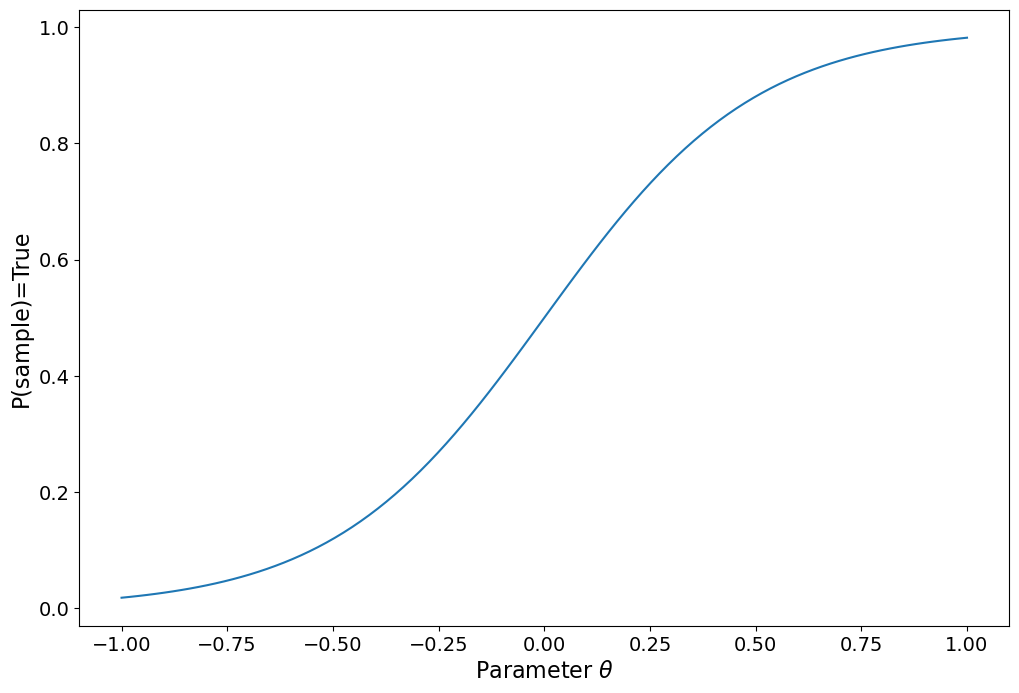

In [89]:
theta = np.linspace(-1, 1, 100)
p = 1 / (1 + np.exp(-4 * theta))

ax = pd.Series(p, index=theta, name="probability").plot(figsize=(12, 8), fontsize=14)
plt.xlabel("Parameter $\\theta$", fontsize=16)
plt.ylabel("P(sample)=True", fontsize=16)

Text(0.5, 0, 'Parameter $\\theta$')

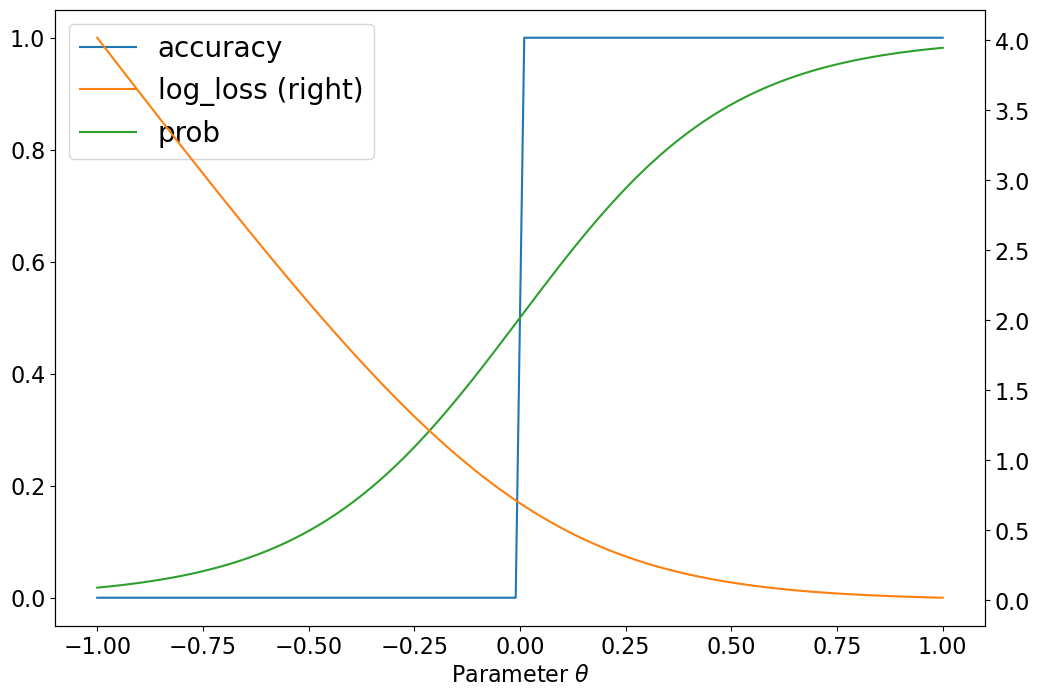

In [90]:
theta = np.linspace(-1, 1, 100)
p = 1 / (1 + np.exp(-4 * theta))


y_true = np.ones(theta.shape[0])

acc = ((p >= 0.5).astype(int) == y_true).astype(int)
lloss = -1 * (y_true * np.log(p) + (1 - y_true) * np.log(1 - p))

import pylab

params = {"legend.fontsize": 20, "legend.handlelength": 2}
pylab.rcParams.update(params)

ax = pd.DataFrame({"accuracy": acc, "log_loss": lloss, "prob": p}, index=theta).plot(
    secondary_y="log_loss", fontsize=16, figsize=(12, 8)
)
ax.set_xlabel("Parameter $\\theta$", fontsize=16)

# $ \\ $
# $ \\ $
# $ \\ $
![workflow](ml_workflow.jpg)
## In fact, accuracy and log loss are not the only ways to evaluate classification problems

# $ \\ $
# $ \\ $
# Evaluating Classification Models:
 - ## How might we want to evaluate classification models?
 - ## What's wrong with accuracy and log loss?

# $ \\ $
# $ \\ $
 - ## Log loss provides a nice differentiable function to minimize
 - ## Accuracy provides a nice, interpretable way to understand results


# $ \\ $
# $ \\ $
# Imagine a problem that has a class imbalance:
# $ \\ $

In [93]:
from scipy.sparse import vstack

td_test_unbalanced = vstack(
    [
        term_document_matrix_test[y_test == 0],
        term_document_matrix_test[y_test == 1][:12],
    ]
)
y_test_unbalanced = np.array([0] * (y_test == 0).sum() + [1] * 12)

In [94]:
unbalanced_preds = lr.predict(td_test_unbalanced)
accuracy_score(y_test_unbalanced, unbalanced_preds)

0.8769181585677749

In [95]:
log_loss(y_test_unbalanced, lr.predict_proba(td_test_unbalanced))

0.37575261575143426

# Can we do better?
# $ \\ $
# $ \\ $


In [97]:
accuracy_score(y_test_unbalanced, np.zeros_like(y_test_unbalanced))

0.9990409207161125

In [98]:
log_loss(y_test_unbalanced, np.zeros_like(y_test_unbalanced))

0.03456872128112281

# $ \\ $
# $ \\ $
# Log loss and accuracy fail to catch some nuance here.
 - ## What should we do? 

# $ \\ $
# $ \\ $
# $ \\ $
# $ \\ $
# Other Metrics: Precision and Recall
## We want a way of capturing our success that doesn't care about class balance
 - ## Example: how many positives examples did we identify above OF THE 12 THAT WERE PRESENT?

# $ \\ $
# It will help to define a few concepts:
 - ## True positive: predicted positive & actually positive
 - ## True negative: predicted negative & actually negative
 - ## False positive: predicted positive & actually negative
 - ## False negative; predicted negative & actually positive

# $ \\ $
# $ \\ $


In [100]:
preds = lr.predict(td_test_unbalanced)
tp = preds & y_test_unbalanced
fp = preds & ~y_test_unbalanced
tn = ~preds & ~y_test_unbalanced
fn = ~preds & y_test_unbalanced

assert tp.sum() + fp.sum() + tn.sum() + fn.sum() == y_test_unbalanced.shape[0], 'something has gone wrong'

# $ \\ $
# $ \\ $
# $ \\ $
## With these building blocks we can construct lots of different metrics
# $ \\ $
# $ \\ $
# Two new metrics
# Precision: 
 - ## What fraction of the positive predictions were correct
 - ## precision $= \frac{\mathrm{true\, positives}}{\mathrm{true\, positivies} \, + \,  \mathrm{false\, positives}}$

# Recall:
 - ## What fraction of the true positives were actually found
 - ## Recall $= \frac{\mathrm{true\, positives}}{\mathrm{true\, positivies} \, + \,  \mathrm{false\, negatives}}$


# $ \\ $ 
# $ \\ $ 
![precision recall](PrecisionRecall.png)

In [103]:
prec_score = tp.sum() / (tp.sum() + fp.sum())
rec_score = tp.sum() /  (tp.sum() + fn.sum())
print('precision: {:.3f}'.format(prec_score))
print('recall: {:.3f}'.format(rec_score))

precision: 0.006
recall: 0.750


# $ \\ $
# $ \\ $
# $ \\ $
## Are those numbers even good?
# $ \\ $
# $ \\ $
# $ \\ $
## Question: what are the max and min values for precision and recall?
# $ \\ $
# $ \\ $
# $ \\ $

# $ \\ $
# $ \\ $
# $ \\ $
## In reality, we'll typically let `scikit-learn` do this for us
 - ## `from sklearn.metrics import precision_score, recall_score`

# $ \\ $
## NB: this is not the type of code you should find yourself writing
 - ## These are widely used metrics so someone should have implemented it for you
 - ## Using a widely-used implemetation means it is less error prone
 - ## Unsurprisingly, `scikit-learn` has take care of lots of checks and edge cases
    - ### all one class
    - ### `NaN` (recall, we already ran into `NaN` problems)
    - ### non-categorical values

# $ \\ $
# $ \\ $

In [106]:
from sklearn.metrics import precision_score, recall_score

print('precision: {:.3f}'.format(precision_score(y_test_unbalanced, preds)))
print('recall: {:.3f}'.format(recall_score(y_test_unbalanced, preds)))


precision: 0.006
recall: 0.750


# $ \\ $
# $ \\ $
# Question: How do we write `accuracy` in our new language?
# $ \\ $
# $ \\ $
# $ \\ $
# $ \\ $
# $$acc = \frac{tp \,+ \, tn}{tp \,+\, tn\, + fp \,+\,  fn}$$
# $ \\ $

# $ \\ $
# $ \\ $
# $ \\ $

## We can see that precision and recall are compliments
 - ## When we over-optimize for one, the other one suffers
 - ## We trade off false positives for false negatives, but there's no free lunch

# $ \\ $
# $ \\ $ 
## Imagine we choose a different threshold instead of $P=0.5$
 - ## NB: this will be homework to do manually




Text(0.5, 1.0, 'Precision-Recall Tradeoff')

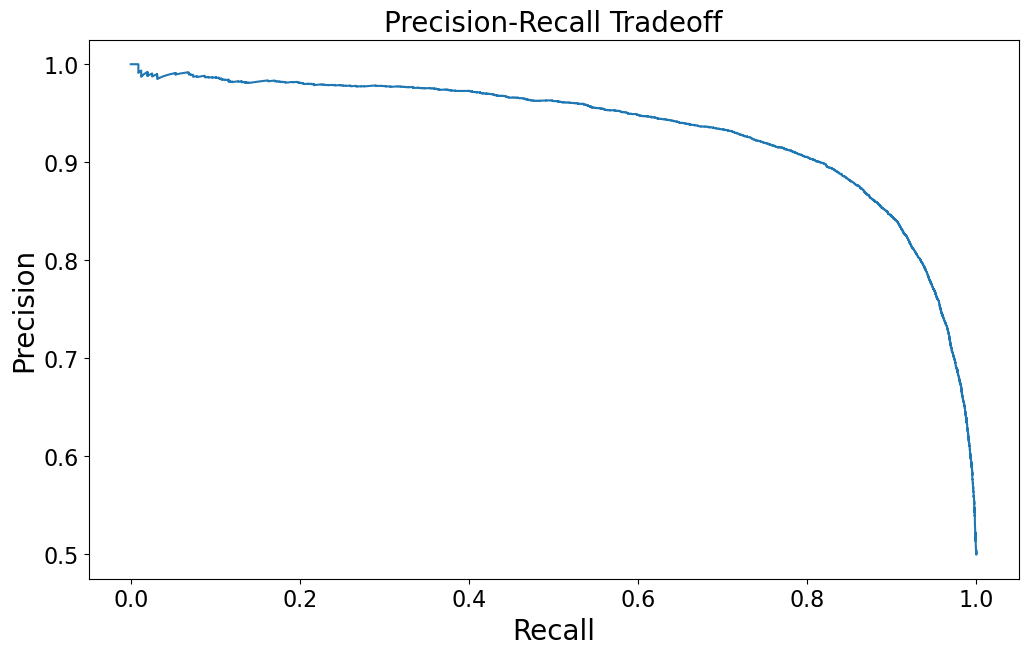

In [109]:
from sklearn.metrics import precision_recall_curve
pr, rc, _ = precision_recall_curve(y_test, lr.predict_proba(term_document_matrix_test)[:, 1])
pd.Series(pr, index=rc).sort_index().plot(figsize=(12,7), fontsize=16)
plt.xlabel("Recall", fontsize=20)
plt.ylabel("Precision", fontsize=20)
plt.title("Precision-Recall Tradeoff", fontsize=20)

# $ \\ $
# Where on this curve we want to sit is problem-specific
# $ \\ $
# $ \\ $
# $ \\ $


# $ \\ $
# $ \\ $
## It is useful to boil them down together into one metric
## The $f-score$  or  $f_{1}score$ is the harmonic mean of precision and recall
# $$f_{1} = 2 \frac{prec\, +\, rec}{prec\, * \,rec}$$

In [112]:
from sklearn.metrics import f1_score

print("f1 score: {:.3f}".format(f1_score(y_test_unbalanced, preds)))

f1 score: 0.012


# $ \\ $
# $ \\ $
# Question: which of these new metrics is differentiable?
# $ \\ $
# $ \\ $
# $ \\ $
## With this new vocabulary, there are lots of metrics that we can construct
# $ \\ $

## NB: different problems / fields will care about different things
 - ## E.g. in medicine, researchers like to use

## $$\mathrm{specificity} = \frac{true \, negatives}{true\, negatives\, +\, false \, positives}$$
## Because it has a useful interpretation for medical tests:
 - ## e.g. the percentage of healthy people who are correctly identified as not having the condition

# $ \\ $

# $ \\ $
# $ \\ $
# $ \\ $

# Quick Recap: So far we have
 - ## Learned what classification is
 - ## Seen a famous problem of sentiment analysis and explored the IMDB data set
 - ## Represented words as a `Bag of Words`
 - ## Proposed and used logistic regression to model the sentiment problem
 - ## Introduced new language of true positives, false positives etc
 - ## Constructed new metrics for classification (e.g. precision/recall)

# $ \\ $
# $ \\ $

# What does logistic regression assume about our data?
# $ \\ $
# What other models could we propose for the sentiment problem
# $ \\ $
# $ \\ $
# $ \\ $
# Our Second NLP Model: Naive Bayes
 - ## Once we've gone through the trouble to understand and create the bag of words representation for text, we can use it in other suitable models.

# $ \\ $
# $ \\ $
# Bayes Theorem
## Recall, perhaps from a statistics class long ago...
# $$P\left(a|b\right) = \frac{P\left(b|a\right)P\left(a\right)}{P\left( b\right)}$$

# $ \\ $
# $ \\ $
## Question: how is this actually useful?
## Example: For a deck of cards
## The probability that I draw a `4` given that I draw a `spade`
  - # $$P(4|spade) = \frac{p(spade|4)P(4)}{P(spade)} = \frac{0.25 * (1/13)}{0.25} = \frac{1}{13}$$


# $ \\ $
# $ \\ $
## Why do I need this? I can just write down $P(4|spade) = \frac{1}{13}$
# $ \\ $
# $ \\ $
# $ \\ $
# $ \\ $
## Bayes' theorem is useful in cases where there is an assymetry in how hard it is to calculate probabilities.
# $ \\ $
# $ \\ $
## Consider $P\left(data|model\right)$ and $P\left(model|data\right)$
 - ## We typically want to find the right model ($P\left(model|data\right)$) but it is too hard to calculate
 - ## Sometimes $P\left(data|model\right)$ is easier
   - ## This is often when the model is some sort of generative model


# $ \\ $
# $ \\ $
# $ \\ $
# $ \\ $

## We want to find the probability that a document $d$ belongs to a class $c$
# $$P\left(c|d\right)$$
## but it is hard to calculate, so we use Bayes' theorem to express it as
# $$P\left(c|d\right) = \frac{P\left(d|c\right)P\left(c\right)}{P\left( d\right)}$$
## So our most likely model is
# $$C_{MAP} = \underset{c\in C}{argmax}\,\,P\left(c|d\right) $$
# $$ = \underset{c\in C}{argmax}\,\,\frac{P\left(d|c\right)P\left(c\right)}{P\left( d\right)} $$
# $$ = \underset{c\in C}{argmax}\,\,P\left(d|c\right)P\left(c\right) $$
# $ \\ $
# $ \\ $
## If we imaging that a document $d$ is comprised of features  $\{ x_{1}...x_{N}\}$ we get
# $$C_{MAP} = \underset{c\in C}{argmax}\,\,P\left( x_{1}...x_{N}|c\right)P\left(c\right) $$
# $ \\ $
# $ \\ $
## We can think of this as 
# $$C_{MAP} = \underset{c\in C}{argmax}\,\,P\left(\mathrm{observed\,\, features}|c\right)P\left(c\right) $$
# $ \\ $
# $ \\ $
# $ \,\,\,\,\,\,\,$ That was a lot of math... come back if you're lost
# $ \\ $
# $ \\ $

# To make this tractable we need two additional ingredients/asumptions:
 - ## 1. The bag of words representation: i.e. position in the sentence doesn't matter 
 - ## 2. Conditional indepdence: the probabilities of each feature are independent from one another
   - ## $$P\left(x_1...x_N | c \right) = P\left(x_1 | c\right) * P\left(x_2 | c\right) ... P\left(x_N | c\right)$$
   - ## $$ = \prod_{x \in X}P\left(x | c \right)$$
   - ## This is the `NAIVE` part of naive Bayes.

# $ \\ $
# $ \\ $
# $ \\ $
## Finally, we can think of this as 
 - # $$C_{NB} = \underset{c\in C}{argmax}\,\,\prod_{x \in X}P\left(x|c\right)P\left(c\right) $$
 - # $$ = \underset{c\in C}{argmax}\,\,P\left(c\right)\prod_{x \in X}P\left(x|c\right)$$
 - # $$ = \underset{c\in C}{argmax}\,\,P\left(c\right)\prod_{x \in X}P\left(\mathrm{observing\,\, word\,\, x}|c\right)$$

# $ \\ $
# $ \\ $
# A few notes:
 - ## We often call $P\left( c \right)$ a `prior`. It can be thought of as the probability of finding each catagory $c$ in the absence of other evidence
 - ## That is a lot of math but it all came from Bayes' theorem and isn't terribly important
 - ## We got a great simplification from the bag of words and conditional independence assumption. 

# $ \\ $
# $ \\ $



## How do we solve for $C_{NB}$? 
 - ## What is $P\left(c\right)$? $P\left(x_i | c\right)$?

# $ \\ $
# $ \\ $
# Simplest way: using frequency counts 
# $ \\ $
# $ \hat{P} \left( c \right) = \frac{\mathrm{\#\, docs\, in\, category} \, c}{\mathrm{total \, \#\, docs}}$ 
# = fraction of documents that are in category $c$
# $ \\ $
# $ \hat{P} \left(word_i |  c \right) = \frac{count(word_i, c)}{\sum_{w \in \mathrm{vocab}}count(w, c)} $
#  $\, \,\,\,$= fraction of times $word_i$ appears among all the words in category $c$
# $ \\ $
# This is also referred to as `Multinomial Naitve Bayes` because it assumes that the data are distributed multinomially. 
# $ \\ $
# $ \\ $
# $ \\ $
## Other assumptions exist, for example, Gaussian Naive, where
# $ \hat{P} \left(word_i |  c \right) \frac{1}{\sqrt{2\pi \sigma}}\exp \left(\frac{-(w_i - \mu_c)^2}{2\sigma_y^2} \right)$
# $ \\ $



# $ \\ $

In [118]:
from sklearn.naive_bayes import MultinomialNB
MultinomialNB?

Init signature:
MultinomialNB(
    *,
    alpha=1.0,
    force_alpha=True,
    fit_prior=True,
    class_prior=None,
)
Docstring:     
Naive Bayes classifier for multinomial models.

The multinomial Naive Bayes classifier is suitable for classification with
discrete features (e.g., word counts for text classification). The
multinomial distribution normally requires integer feature counts. However,
in practice, fractional counts such as tf-idf may also work.

Read more in the :ref:`User Guide <multinomial_naive_bayes>`.

Parameters
----------
alpha : float or array-like of shape (n_features,), default=1.0
    Additive (Laplace/Lidstone) smoothing parameter
    (set alpha=0 and force_alpha=True, for no smoothing).

force_alpha : bool, default=True
    If False and alpha is less than 1e-10, it will set alpha to
    1e-10. If True, alpha will remain unchanged. This may cause
    numerical errors if alpha is too close to 0.

    .. versionadded:: 1.2
    .. versionchanged:: 1.4
       The d

In [119]:
nb = MultinomialNB()
nb.fit(term_document_matrix_train, y_train)
print()

In [120]:
pd.Series(nb.class_count_, index=["neg", "pos"])

neg    12500.0
pos    12500.0
dtype: float64

In [121]:
preds = nb.predict(term_document_matrix_test)
accuracy_score(y_test, preds)

0.81408

# $ \\ $
# $ \\ $
# $ \\ $
# Why use Naive Bayes?
 - ## We didn't even do better than logistic regression!

# $ \\ $
# $ \\ $
# Advantages of Naive Bayes
 - ## Works online: we can keep updating our model if we get more data
   - ## This is `partial_fit` in `scikit-learn` parlance
   - ## You can't do this with logistic regression
 - ## Works `out of core`: very easy to handle more data than you can fit in memory
   - ## Some implementations of logistic regression can handle this, but `scikit-learn`'s cannot
 - ## Works well in low-data environments because it is a high-bias algorithm
# $ \\ $
# $ \\ $


# $ \\ $
# $ \\ $
## Naive Bayes and logistic regression seem very similar
 - ## Both depend on similar features (e.g. BOW)
 - ## Both learn a parameter associated with each word that makes each class more/less likely.
   - ## `feature_log_prob` is like `coeff_`
   - ## `class_log_prior` is like `intercept_`
   - ## In fact, while deprecated, `sklearn` even exposes `coef_` in `MultinomialNB`
 - ## The difference is whether we do $\sigma \left( \theta ^{T} X \right)$ or $\prod$ fraction $w_{i}$ appears with $c$

# $ \\ $
# $ \\ $
## There is something a little deeper here: Generative vs discriminative models
# $ \\ $
 - ## Generative: learn the distribution of each $c$ or the process that gives rise each $c$
   - ## In our case: learn the process that gives rise to the features (words) that we see. 
   - ## Then it's easy to pick the class that's most likely given the data.
 - ## Discriminative: learn a boundary between the $c$

# $ \\ $
## They are both types of models that make assumptions. They're just different kinds of assumptions.
# $ \\ $
# $ \\ $

<Figure size 1600x1200 with 0 Axes>

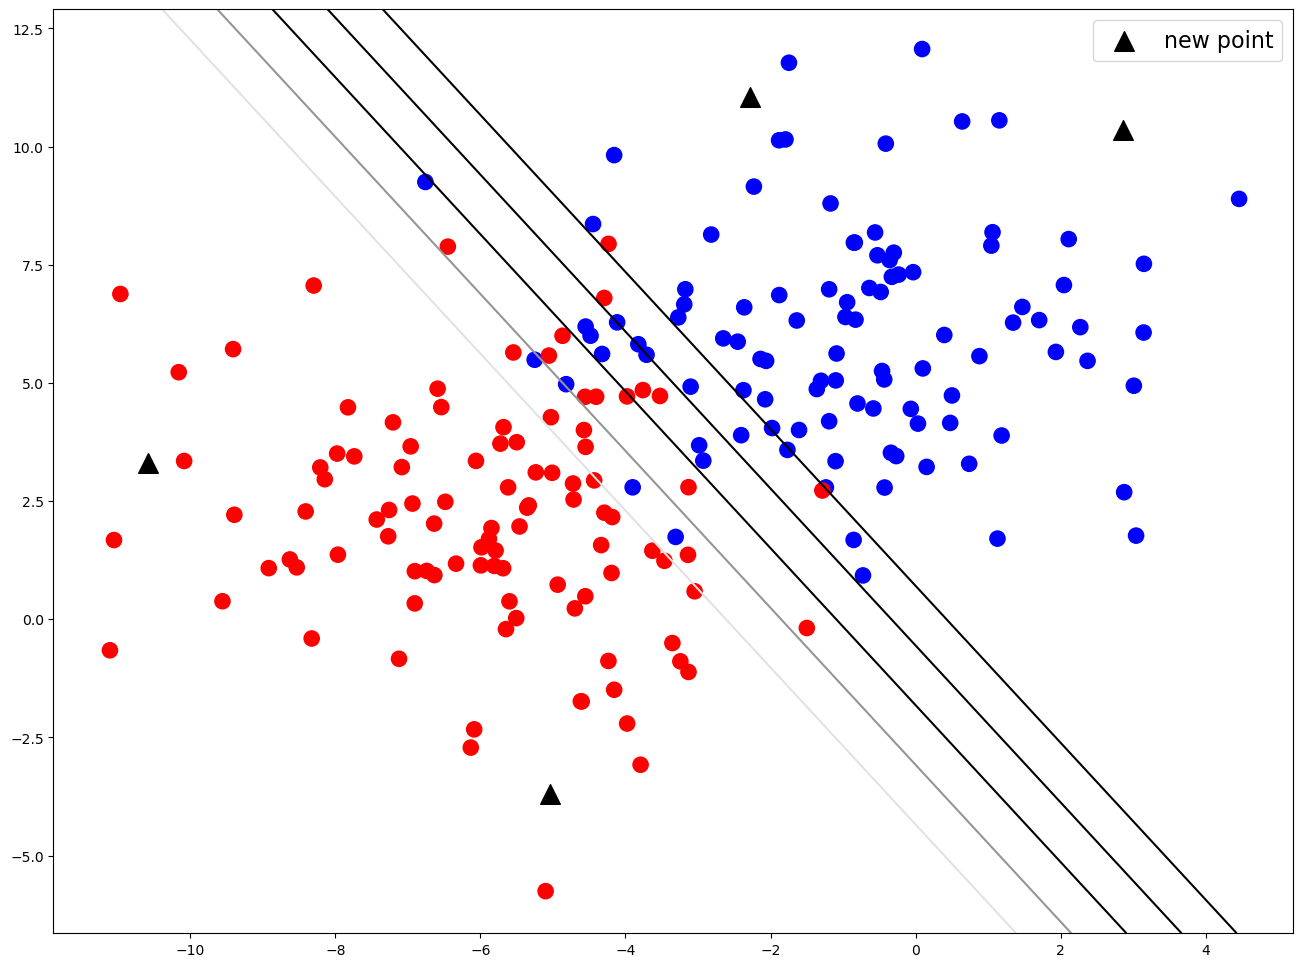

In [124]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from matplotlib.patches import Circle


x, y = make_blobs(n_samples=200, cluster_std=2.3, centers=2, random_state=1234)
colormap = "rb"
colors = [colormap[label] for label in y]

plt.figure(figsize=(16, 12))
f, ax = plt.subplots(figsize=(16, 12))
ax.scatter(x[:, 0], x[:, 1], c=colors, s=120)

lr = LogisticRegression()
lr.fit(x, y)


x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.mgrid[x_min:x_max:0.05, y_min:y_max:0.05]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = lr.predict_proba(grid)[:, 1].reshape(xx.shape)

ax.contour(
    xx, yy, probs, levels=[0.1, 0.25, 0.5, 0.75, 0.9], cmap="Greys", vmin=0, vmax=0.5
)

new_points = grid[np.random.choice(np.arange(grid.shape[0]), 4)]
ax.scatter(
    new_points[:, 0], new_points[:, 1], c="k", marker="^", s=200, label="new point"
)
plt.legend(fontsize=16)

<Figure size 1600x1200 with 0 Axes>

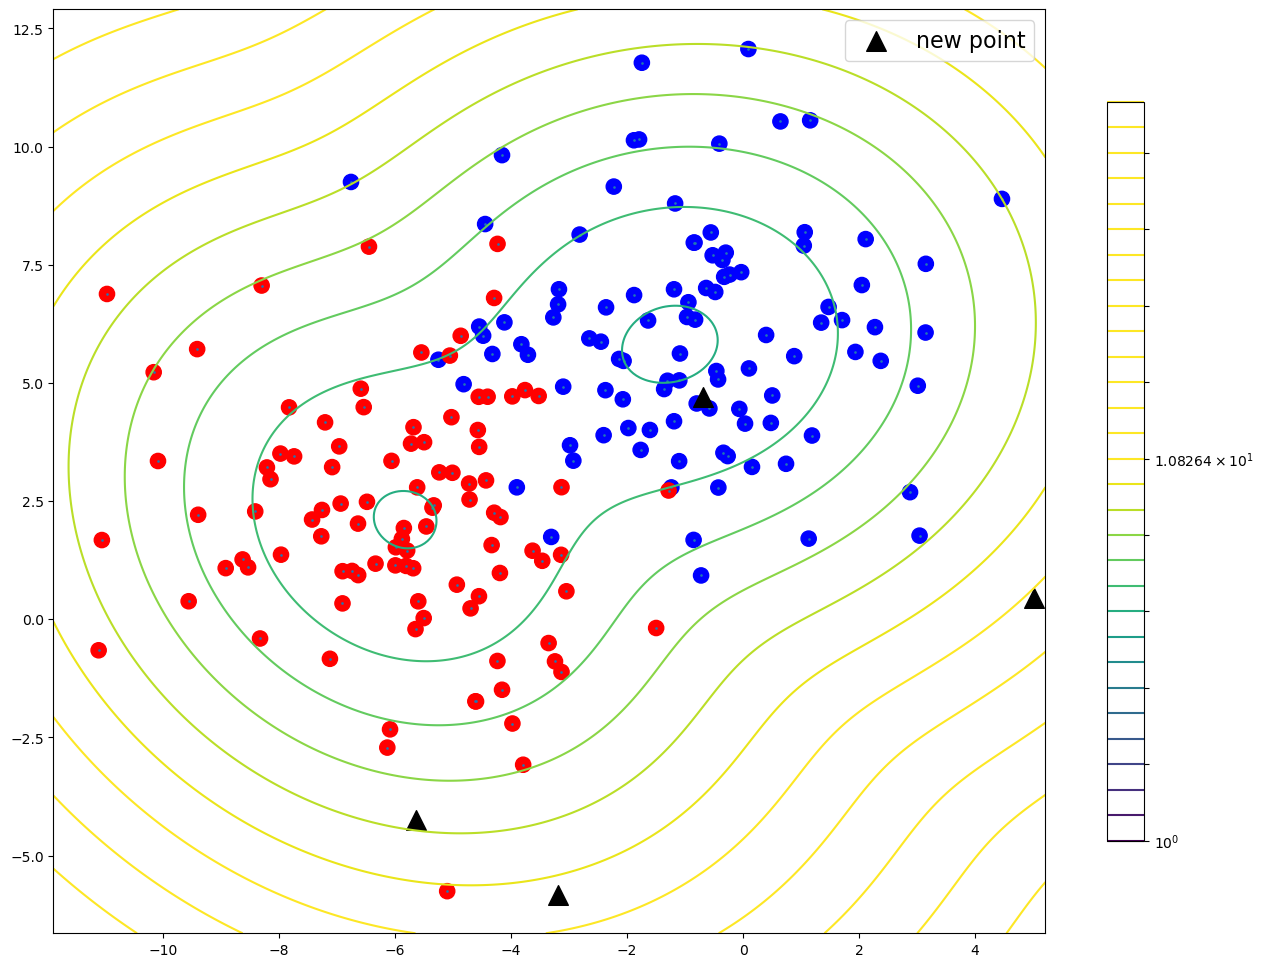

In [125]:
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LogisticRegression
from matplotlib.patches import Circle
from matplotlib.colors import LogNorm



x, y = make_blobs(n_samples=200, cluster_std=2.3, centers=2, random_state=1234)
colormap = "rb"
colors = [colormap[label] for label in y]

plt.figure(figsize=(16, 12))
f, ax = plt.subplots(figsize=(16, 12))
ax.scatter(x[:, 0], x[:, 1], c=colors, s=120)


clf = GaussianMixture(n_components=2, covariance_type='full')
clf.fit(x)



x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.mgrid[x_min:x_max:0.05, y_min:y_max:0.05]
grid = np.c_[xx.ravel(), yy.ravel()]

XX = np.array([xx.ravel(), yy.ravel()]).T


Z = -clf.score_samples(XX)
Z = Z.reshape(xx.shape)


CS = plt.contour(xx, yy, Z, norm=LogNorm(vmin=1.0, vmax=10.0),
                 levels=np.logspace(0, 2, 30))

CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.scatter(x[:, 0], x[:, 1], .8)


new_points = grid[np.random.choice(np.arange(grid.shape[0]), 4)]
ax.scatter(
    new_points[:, 0], new_points[:, 1], c="k", marker="^", s=200, label="new point"
)
plt.legend(fontsize=16)

# $ \\ $
# $ \\ $
# $ \\ $

## On Discriminative vs. Generative classifiers: A comparison of logistic regression and naive Bayes
 - ### Andrew Ng and Michael Jordan
 - ### NIPS 2002

# $ \\ $
![](ng-jordan.png)

# $ \\ $
# $ \\ $
# $ \\ $
# Recap:
 - ## IMBD movie review dataset for sentiment analysis
 - ## Turn text into numbers with `CountVectorizer`
 - ## Chose logistic regression as a first model
 - ## Used `scikit-learn` to solve it
 - ## Learned lots of metrics for evaluating classification problems
   - ## accuracy
   - ## log loss
   - ## precision
   - ## recall
 - ## There are others (you'll see one for homework)
 - ## Introduced another algorithm: naive Bayes
   - ## `Scikit-learn` has a nice implementaion
   - ## Works on-line
   - ## Works well in low-data environments

# $ \\ $
# $ \\ $
# $ \\ $

# Classification in practice:
# No data
 - ## Find data
 - ## Make rules 
   - ## e.g. ("note" or "debt") + "finance" $ = category(about\,\, interest \,\, rates)$

# $ \\ $
# Little data
 - ## Try naive Bayes
 - ## get more data
 - ## genarate more (synthetic) data

# $ \\ $
# Lots of data
 - ## Don't use Naive Bayes
 - ## try Logistic regression

# $ \\ $
# Too much data
 - ## Logistic regression might be too hard
 - ## Algorithms may not matter
 - ## Try naive Bayes
   - ## Fast to do inference
   - ## Easy to update model

# $ \\ $
[Banko and Brill](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/acl2001.pdf)
![](banko-brill.png)

# $ \\ $
# $ \\ $